In [ ]:
#Python 3.11.2
#Import packages
import scipy.integrate as scipy
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from collections import defaultdict
import json # for pretty printing

In [ ]:
#ODEs
def SIRD_model(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dS_dt = - beta * I * (S / ((S+I+R)*1.0))
    dI_dt = beta * I * (S / ((S+I+R)*1.0))  - gamma * I
    dR_dt = gamma * mu * I
    dD_dt = gamma * (1 - mu) * I
    return ([dS_dt, dI_dt, dR_dt,dD_dt])

In [ ]:
#Parameters
gamma = 0.32
mu = 0.43
N = 299
beta = 0.358

#Initial condition
S0 = N-1
I0 = 1
R0 = 0.0
D0 = 0.0

#Time vector
t = np.linspace(0, 300, num=600)

#Result
solution = scipy.odeint(SIRD_model, [S0, I0, R0, D0], t, args=(N, beta, gamma,  mu))


In [ ]:
print(solution)
dimension = solution.shape
print(dimension)

[[2.98000000e+02 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.97819671e+02 1.01857752e+00 6.47007712e-02 9.70511567e-02]
 [2.97636048e+02 1.03744764e+00 1.30601844e-01 1.95902766e-01]
 ...
 [1.73414044e+02 8.83856755e-04 5.02340290e+01 7.53510435e+01]
 [1.73413922e+02 8.65280260e-04 5.02340851e+01 7.53511276e+01]
 [1.73413803e+02 8.47094229e-04 5.02341399e+01 7.53512099e+01]]
(600, 4)


In [ ]:
# assuming `solution` is a numpy array
cumulative_deaths = [
      solution[i, 3] for i in range(solution.shape[0])
]
#for i in range(solution.shape[0]):
  # cumulative_deaths.append(solution[i, 3])
   #print(cumulative_deaths)
daily_deaths = [
   cumulative_deaths[i]-cumulative_deaths[i-1] 
   for i in range(1, len(cumulative_deaths),2)
   ]
#for i in range(1, len(cumulative_deaths)):
  #death_diff = cumulative_deaths[i]-cumulative_deaths[i-1]
  #daily_deaths.append(death_diff) 


In [ ]:
#print(cumulative_deaths)
#len(cumulative_deaths)
print(range(solution.shape[0]))
print(daily_deaths)
len(daily_deaths)

range(0, 600)
[0.09705115674784814, 0.10068033468535983, 0.10442350298891068, 0.10828245624700206, 0.11225887884728558, 0.11635431211647607, 0.12057013770869207, 0.12490755745269522, 0.12936758220744426, 0.13395101241744278, 0.13865838935425767, 0.14349001777255488, 0.14844591593932277, 0.1535258024634576, 0.1587290712292928, 0.16405476403454466, 0.16950155386357135, 0.17506771496422857, 0.18075110293339236, 0.1865491274498572, 0.19245873106407085, 0.1984763643352938, 0.204597964151346, 0.2108189330899961, 0.21713411582878805, 0.22353778877399488, 0.2300236291441511, 0.23658472069535996, 0.2432135140042515, 0.24990185370272222, 0.2566409261597169, 0.26342131215769626, 0.2702329235798864, 0.27706508121205964, 0.283906445338463, 0.29074511318219365, 0.29756855389516446, 0.30436371570503873, 0.3111169782065648, 0.3178142580664378, 0.3244409907028203, 0.33098222230204044, 0.33742263786926685, 0.3437466008249572, 0.3499382914566773, 0.35598170660944106, 0.36186071823554755, 0.36755922295597

300

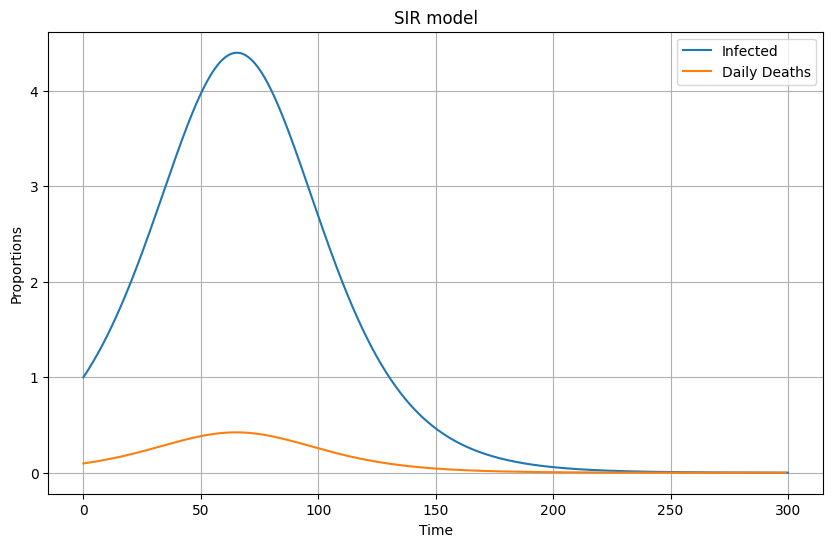

In [ ]:
#Plot result
plt.figure(figsize=[10,6])
#plt.plot(t, solution[:,0], label='Susceptible')
plt.plot(t, solution[:,1], label='Infected')
#plt.plot(t, solution[:,2], label='Recovered')
#plt.plot(t, solution[:,3], label='Dead')
plt.plot(daily_deaths, label='Daily Deaths')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('SIR model')
plt.show()

Defining the transmission rate as a seasonality function

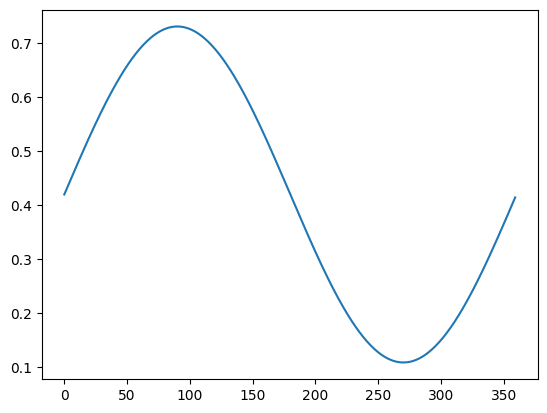

In [ ]:

def seasonal_transmission_rate(beta_0, beta_1, frequency,a, t):
    beta_t = beta_0 * (1 + beta_1 * np.sin((2 * np.pi)* frequency * t))
    return beta_t

# Generate some example data with seasonality
t = np.arange(0, 360)
beta_0 = 0.42
beta_1 = 0.74

# Plot beta 
plt.plot(t, seasonal_transmission_rate(beta_0, beta_1, 1/(360*1.0),-1.2, t))
plt.show()



0 10


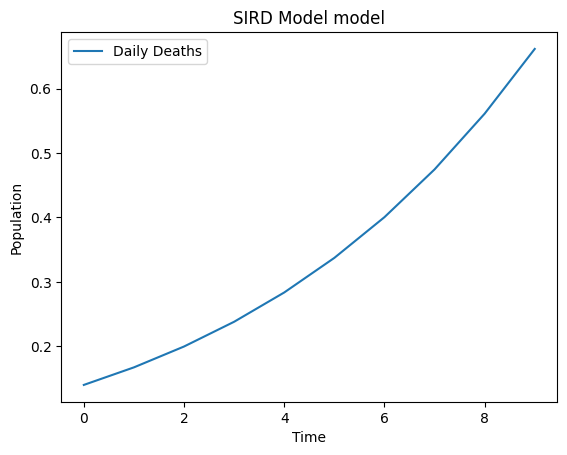

In [ ]:
def plot_SIRD_solution(model: dict, state:list[str] = ['S', 'I', 'R', 'D','DailyDeaths']):
    """
    Plots the susceptible, infected, and recovered populations over time for one SIR model.
    
    Parameters:
    - model (dict): a dictionary containing the following fields:
        - "t": a NumPy array of time values
        - "S": a NumPy array of susceptible population values at each time value
        - "I": a NumPy array of infected population values at each time value
        - "R": a NumPy array of recovered population values at each time value
    Returns:
    - None
    """
    if 'S' in state:
        plt.plot(model['t'], model['S'], label='Susceptible')
    if 'I' in state:
        plt.plot(model['t'], model['I'], label='Infected')
    if 'R' in state:
        plt.plot(model['t'], model['R'], label='Recovered')
    if 'D' in state:
        plt.plot(model['t'], model['D'], label='Deaths')
    if 'DailyDeaths' in state:
        t_inf = model['t'].argmin()
        t_sup = model['t'].argmax()
        print(t_inf, t_sup)
        plt.plot(daily_deaths(model, t_inf, t_sup), label='Daily Deaths')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('SIRD Model model')
    plt.legend()
    plt.show()

plot_SIRD_solution(model_dict[1],state=['DailyDeaths'])

In [ ]:
TotalDeathsByParish = np.array([0,40,740,0,80,60,0,0,38,70,0,0,45,0,0,0,270,45,0])#zero means we don't have information
BeginPlagueByParish = np.array([1,61,61,91,91,91,91,121,121,121,121,121,121,121,151,181,271,331,511])#initial day for each parish
EndPlagueByParish = np.array([60,360,270,120,300,120,120,150,510,270,150,150,240,150,180,270,570,570,570])#fix it considering that we don't have the end date for all